# Übung 9

**Gruppenname:**

*Name Ihrer Gruppe*

Gehen Sie wie folgt vor:

1. Bitte benennen Sie jetzt dieses Jupyter Notebook um (z.B. über `File -> Rename`):

   Namensschema: `Gruppenname-X`. Ersetzen Sie "X" mit der oben angegebenen Nummer der Übung.

   - Beispiel 1: Team REZA bearbeitet Übung 2. Das Notebook heißt: REZA-2.
   - Beispiel 2: Sie sind keinem Team zugeordnet (nicht empfehlenswert) und bearbeiten Übung 2: Ihr Notebook heißt: Nachname-2.


2. Tragen Sie Ihren Gruppennamen auch ganz oben bei "Name Ihrer Gruppe" ein.

3. Bearbeiten Sie dann dieses Notebook. Vergessen Sie dabei nicht, das Jupyter Notebook regelmäßig zu speichern (z.B. über `Strg + S` oder über `File -> Save and Checkpoint`).

### In dieser Übung ...

... werden Sie vertraut mit Clustervalidierungstechniken. Diese sind nützlich, um Parameter (wie beispielsweise die Anzahl der Cluster) einzustellen und die Qualität eines Clusterings zu bewerten.

### 9.1 Prediction Strength (Bestimmung der Clusteranzahl für K-Means)

Sie haben in der Vorlesung verschiedene Clustervalidierungsverfahren kennengelernt. Die *Prediction Strength* ist eine empfehlenswerte Validierungsmethode, die Sie im Rahmen dieser Übung implementieren und damit Ihr Verständnis vertiefen werden.

Hinweise

- Nutzen Sie die Implementierung des K-Means Algorithmus von Scikit-Learn. 
- Für die Implementierung der *Prediction Strength* können Sie numpy, sklearn und scipy verwenden.

**Ihre Aufgaben**

(1) Schlagen Sie in den Vorlesungsfolien nach, wie die Prediction Strength definiert ist.

(2) Ich habe Ihnen synthetische Daten zur Übung bereitgestellt. Bitte führen Sie die unten stehende Code-Zelle aus. Sie erzeugt 150 Datenpunkte mit je zwei Features (Merkmalen, Array **X**), organisiert in 5 Clustern. Die "wahren" Clusterzugehörigkeiten sind im Vektor **y** kodiert.

- In der Praxis haben Sie selbstverständlich keine wahren Clusterzugehörigkeiten vorliegen. Sie wollen vielmehr im Rahmen Ihrer Clusteranalyse diese Clusterzugehörigkeiten erkennen. In dieser Übung nutzen wir **y** lediglich für die Visualisierung, die die folgende Codezelle erzeugt, und löschen danach diese Variable wieder.

In [9]:
import io
import matplotlib.pyplot as plt
import pandas as pd
import io
import numpy as np
import seaborn as sbn
import seaborn_image as isbn
from matplotlib import pyplot as plt
import ipywidgets as widgets
# from pandas.conftest import axis
from networkx import bipartite_layout
from scipy.ndimage import label
from sklearn.datasets import fetch_olivetti_faces
from skimage.exposure import adjust_gamma
from skimage.exposure import rescale_intensity
from sklearn.datasets import make_swiss_roll
from sklearn.metrics import pairwise_distances
from scipy.sparse.csgraph import shortest_path
from scipy.spatial import distance
from sklearn.neighbors import kneighbors_graph
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from IPython.display import display
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn import model_selection as sk_ms
from sklearn.neighbors import KNeighborsClassifier
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.feature_selection import mutual_info_regression
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt, rcParams
rcParams['figure.figsize'] = (8, 6)
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import  cluster as skc
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt, rcParams
from  scipy.spatial import distance
plt.rcParams["figure.figsize"] = [10, 7]
font =  {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 18,
        }
kwargs = {'edgecolor': "black",  # for edge color
          'linewidth': 2,  # line width of spot
    }

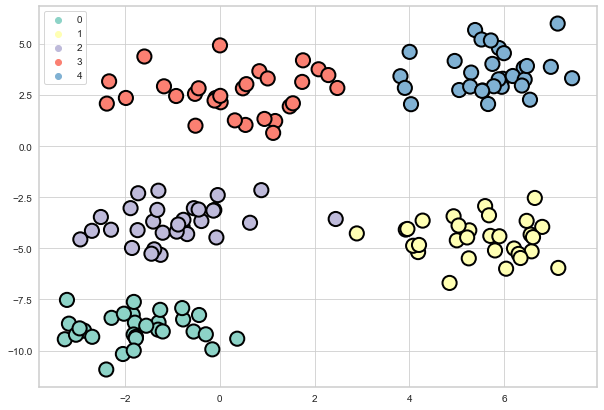

In [5]:

# generate data
X, y = make_blobs(n_samples=150, centers=5, cluster_std=1, random_state=40)

# visualize data
sbn.scatterplot(x=X[:, 0], y=X[:, 1], c=y, hue=y, s= 200, palette='Set3', **kwargs)

del y

(3) [Teilen Sie](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) die Daten **zufällig** in ein Trainings- und ein Validierungsset auf. Das Validierungsset soll dabei 20% der Gesamtdatenpunkte enthalten, das Trainingsset 80%.

- Ihre Datenvariablen heißen `X_train` und `X_valid`. (Scikit-Learn bezeichnet unser Validierungsset als Testset; lassen Sie sich dadurch nicht verwirren.)

- Nutzen Sie `random_state=40`, damit Sie Ihre Ergebnisse einfach mit denen Ihrer Kolleginnen und Kollegen vergleichen können.

In [7]:
# x_train, x_valid = train_test_split(X, test_size= 0.2, random_state= 40, shuffle=True )
x_train, x_valid = train_test_split(X, test_size= 0.2, random_state= 40)
display(x_train.shape)

(120, 2)

(4) Für die nachfolgenden (Debugging-)Schritte ist es hilfreich, wenn Sie bereits jetzt mittels K-Means jeweils Cluster im Trainings- und Validierungsset bestimmen.

- Nutzen Sie bei den nachfolgenden Schritten jeweils `random_state=42`, um vergleichbare Ergebnisse wie Ihre Kolleginnen und Kollegen zu erhalten.

1. Ermitteln Sie mittels [K-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) $K=8$ Cluster im **Trainingsset**. Speichern Sie die *Centroids* (auch *cluster_centers* genannt) der Cluster in der Variablen `train_centroids`.
2. Ermitteln Sie mittels eines **neuen** K-Means Modells ebenfalls $K=8$ Cluster im **Validierungsset**. Speichern Sie die Clusterzugehörigkeiten (*cluster labels*) der Daten im Validierungsset in der Variablen `valid_labels`.

In [8]:
# Trainingsset
km_train = skc.KMeans(n_clusters=8, random_state=42)
km_train.fit(x_train)
train_centroids = km_train.cluster_centers_

#Validierungsset
km_valid = skc.KMeans(n_clusters=8, random_state=42)
km_valid = km_valid.fit(x_valid)
valid_labels = km_valid.labels_
display(valid_labels,train_centroids, x_valid.shape)

array([0, 0, 3, 2, 7, 4, 2, 3, 0, 4, 2, 5, 7, 2, 4, 7, 5, 1, 6, 3, 4, 0,
       1, 6, 0, 2, 1, 1, 2, 4])

array([[ 5.68921714,  3.59325201],
       [-2.13360078, -4.5147723 ],
       [ 6.04656076, -4.7045427 ],
       [ 0.05365941,  2.18160134],
       [-1.57465743, -8.94228327],
       [-0.58225712, -3.39022652],
       [ 1.32887197,  3.89022901],
       [ 3.78601248, -3.98739961]])

(30, 2)

(5) Sie werden die Prediction Strength in mehreren Schritten implementieren. Implementieren Sie zunächst eine Funktion `get_comembership_matrix`, die die Co-Membership Matrix $M$ (Ko-Mitgliedschaftsmatrix) aus den Daten bestimmt.

**Hintergrund**

Die Matrix $M$ kodiert, welches Paar von Datenpunkten aus dem Validierungsset demselben Cluster im Trainingsset zugeordnet ist. *Damit enthält die Implementierung der Funktion `get_comembership_matrix` implizit unsere Annahmen darüber, wie ein Clustergebiet im Merkmalsraum aussehen sollte.* Verschiedene Clusterverfahren treffen unterschiedliche Annahmen. Daher unterscheidet sich die Implementierung von `get_comembership_matrix` je nach gewähltem Clusteringverfahren!

Wir wollen später Clusterings validieren, die wir mittels K-Means erzeugt haben. Bei K-Means werden Datenpunkte dem Cluster zugeordnet, dessen *Centroid* (Clusterzentrum) sie am nächsten liegen. Um zu bestimmen, ob zwei Datenpunkte aus dem Validierungsset demselben Cluster des Trainingssets angehören, müssen Sie also prüfen, ob Sie demselben Centroid aus dem Trainingsset am nächsten liegen.

**Hinweise**

- Die Funktion `get_comembership_matrix` nimmt die Daten `X_valid` sowie die `train_centroids` entgegen und gibt die Co-Membership Matrix `M` zurück.

- Bei der Implementierung können Ihnen Funktionen hilfreich sein, die Sie unterstützen bei (i) der Bestimmung [euklidischer Distanzen](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html), (ii) bei der Bestimmung des [Arrayindexes mit dem kleinsten Eintrag](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html) sowie (iii) der [Bestimmung aller Indizes von Arrayeinträgen](https://numpy.org/doc/stable/reference/generated/numpy.argwhere.html), die eine Bedingung erfüllen.


In [9]:
def co_membership_matrix(data_val, training_centroids):
    dist = distance.cdist(data_val,training_centroids, metric='euclidean')
    indices = np.argmin(dist, axis=1)
    n = data_val.shape[0]
    mat = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            mat[i][j] = (indices[i] == indices[j])
    return mat
M = co_membership_matrix(x_valid,train_centroids)
assert np.all(M == M.T)
assert np.all(M.diagonal() == np.ones(M.shape[0]))
display(M.shape)

(30, 30)

(6) Implementieren Sie nun die Funktion `get_prediction_strength`, die eine Co-Membership Matrix `M`, die Clusterzugehörigkeiten auf dem Validierungsset `valid_labels` sowie die Anzahl $K$ von Clustern entgegennimmt und die *Prediction Strength* `ps` zurückliefert.

- Rufen Sie sich dazu noch einmal mithilfe der Vorlesungsfolien in Erinnerung, wie die Prediction Strength definiert ist.
- Bei der Implementierung kann Ihnen [dies hier](https://numpy.org/doc/stable/reference/generated/numpy.argwhere.html) hilfreich sein.

In [35]:
t = np.array([[1,1,1,1]])
t1 = np.array([1,1,1,1])
display(t.shape,t1.shape)

(1, 4)

(4,)

In [10]:
def prediction_strength(cmat, vls, ks):
    ps = []
    for k in range(ks):
        eqs = np.argwhere(vls == k).flatten()
        if eqs.shape == (1,):
            ps.append(0)
        else:
            sum_elems = 0
            for vl in eqs:
                for ivl in eqs:
                    if  ivl != vl:
                        sum_elems += cmat[vl][ivl]
            ps.append(sum_elems/(eqs.shape[0]*(eqs.shape[0] -1)))
    return min(ps)
print(prediction_strength(cmat=M,vls=valid_labels,ks=8))

0.3333333333333333


(7) Visualisieren Sie die *Prediction Strength* als Funktion der Clusteranzahl $K$ für $K\in\{1, \ldots 9\}$.

Hierzu müssen Sie für jeden Wert $K$ ein Clustering auf den Trainingsdaten und auf den Validierungsdaten durchführen, die Co-Membership-Matrix $M$ und anschließend die Prediction Strength bestimmen. Beschriften Sie die y-Achse mit "Prediction Strength" und die x-Achse mit "Clusteranzahl".

In [46]:
def show_ps(data,tsz, ks, rs):
    pss = []
    data_train, data_val = train_test_split(data, test_size= tsz, random_state=rs)
    for k in range(1,ks + 2):
#        training set
        km_training = skc.KMeans(n_clusters=k, random_state=rs +2)
        km_training.fit(data_train)
        training_centroids = km_training.cluster_centers_
#       validation set
        km_val = skc.KMeans(n_clusters=k, random_state= rs + 2)
        km_val.fit(data_val)
        val_labels = km_val.labels_
        cmm = co_membership_matrix(data_val,training_centroids)
        ps = prediction_strength(cmat=cmm, vls= val_labels, ks= k)
        pss.append(ps)

    # return np.array(pss)
    return pss


Text(0.5, 0, 'K-Means')

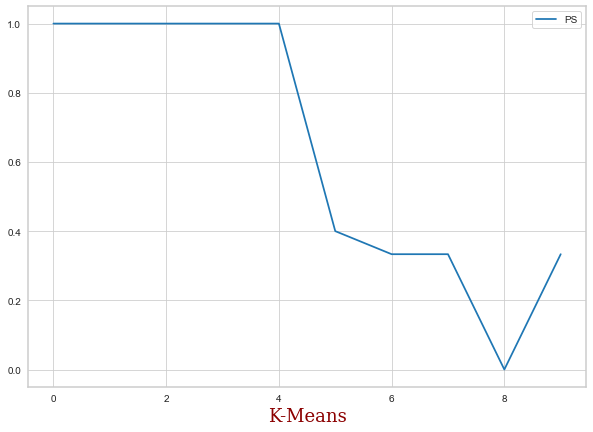

In [50]:
ps_s = show_ps(data=X,ks=9, rs=40, tsz=0.2)
# display(ps_s.shape)
fig = sbn.lineplot(data=ps_s,  label='PS', markers=True, lw=1.75)
fig.set_xlabel('K-Means', fontdict=font)

In [17]:

"""
Notice :This is summarization of the above functions. In the above there is allitel bit bounding error,
which is corrected in this code.
The following is not suitable hierarchical Clustering but good for K-Means
"""

def co_membership_matrix(data_val, training_centroids):
    dist = distance.cdist(data_val,training_centroids, metric='euclidean')
    indices = np.argmin(dist, axis=1)
    n = data_val.shape[0]
    mat = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            mat[i][j] = (indices[i] == indices[j])
    return mat

def prediction_strength(cmat, vls, ks):
    ps = []
    for k in range(ks):
        eqs = np.argwhere(vls == k).flatten()
        if eqs.shape == (1,):
            ps.append(0)
        else:
            sum_elems = 0
            for vl in eqs:
                for ivl in eqs:
                    if  ivl != vl:
                        sum_elems += cmat[vl][ivl]
            ps.append(sum_elems/(eqs.shape[0]*(eqs.shape[0] -1)))
    return min(ps)

def lps(data,tsz, first, last, rs, shuffled = False, n_split=None):
    pss = []
    data_train, data_val = train_test_split(data, test_size= tsz, random_state=rs)
    for k in range(first,last + 1):
#        training set
        km_training = skc.KMeans(n_clusters=k, random_state=rs +1)
        km_training.fit(data_train)
        training_centroids = km_training.cluster_centers_
#       validation set
        km_val = skc.KMeans(n_clusters=k, random_state= rs + 1)
        km_val.fit(data_val)
        val_labels = km_val.labels_
        cmm = co_membership_matrix(data_val,training_centroids)
        ps = prediction_strength(cmat=cmm, vls= val_labels, ks= k)
        pss.append(ps)

    # return np.array(pss)
    return pss
def lps_crossing(data,tsz, first, last, rs, n_split):
    pss = []
    for k in range(first,last + 1):
        splits = sk_ms.ShuffleSplit(n_splits=n_split,test_size=tsz,random_state=rs)
        pss_k = []
        for train_indices, valid_indices in splits.split(data):
            data_train = data[train_indices]
            data_val = data[valid_indices]
#        training set
            km_training = skc.KMeans(n_clusters=k, random_state=rs +1)
            km_training.fit(data_train)
            training_centroids = km_training.cluster_centers_
    #       validation set
            km_val = skc.KMeans(n_clusters=k, random_state= rs + 1)
            km_val.fit(data_val)
            val_labels = km_val.labels_
            cmm = co_membership_matrix(data_val,training_centroids)
            ps = prediction_strength(cmat=cmm, vls= val_labels, ks= k)
            pss_k.append(ps)
        pss.append(sum(pss_k)/n_split)
    return pss

Text(0.5, 0, 'Number of Cluster')

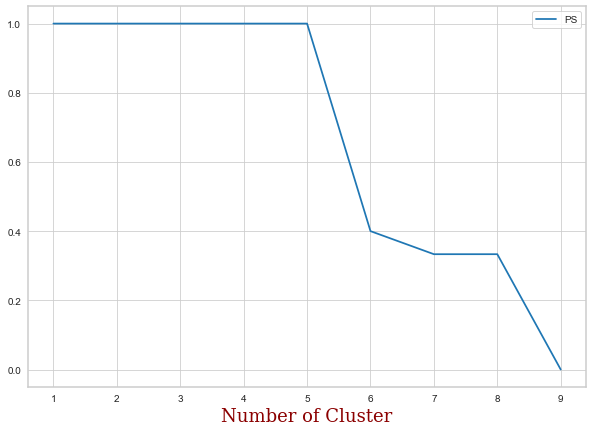

In [21]:
# As you see from the following picture the increasing of the clusters is necessary not always good ida.
ps_s = lps(data=X,tsz=0.2, first=1, last=9, rs=40)
fi = sbn.lineplot(x=np.arange(1,10,1),y=ps_s ,  label='PS', markers=True, lw=1.75)
fi.set_xlabel('Number of Cluster', fontdict=font)

(8) Lesen Sie die optimale Anzahl an Clustern anhand Ihrer Visualisierung aus Schritt (7) ab und geben Sie sie hier an. Die optimale Clusteranzahl ist die größte Zahl $K>1$, für die die Prediction Strength noch den größten Wert annimmt.

- Stimmt die von Ihnen ermittelte Clusteranzahl mit der "wahren" Anzahl der Cluster (vgl. Schritt (1)) in den Daten überein?

Optimale Anzahl der Cluster kann 5 sein.
Ja, Stimmen Wahren Cluster Anzahl überein.

(9) \[Optional\] In der Praxis wird oft die Prediction Strength im Rahmen einer sogenannten Kreuzvalidierung ermittelt. Dabei werden alle Daten `X` in $V$ disjunkte Mengen (sogenannte *Folds*) aufgespalten, wobei die Daten aus $(V-1)$ Folds als Trainingsset und dem verbliebenen Fold als Validierungsset angesehen wird. Durch Durchtauschen der Zuordnungen der Folds zu Trainings- und Validierungsset lassen sich so $V$ mal die Prediction Strength bestimmen (jedes Fold dient einmal als Validierungsdatensatz). Die $V$ Werte für die Prediction Strength werden anschließend arithmetisch gemittelt.

- Bestimmen Sie für $K\in\{1, \ldots, 9\}$ mittels 5-facher Kreuzvalidierung die Prediction Strength und visualisieren Sie sie. Dabei kann Ihnen ggf. [diese Funktion](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html) hilfreich sein.

Text(0.5, 0, 'Number of cluster')

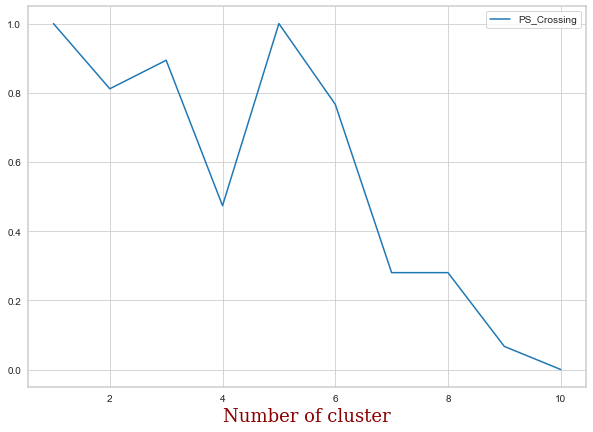

In [23]:
# splits = sk_ms.ShuffleSplit()
pss_c = lps_crossing(data=X,tsz=0.2,first=1, last=10,rs=42,n_split=5)
fi1= sbn.lineplot(x=np.arange(1,11,1), y=pss_c, label='PS_Crossing', markers=True)
fi1.set_xlabel('Number of cluster', fontdict=font)